In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [4]:
houses=pd.read_csv('train.csv')
houses_test=pd.read_csv('test.csv')
print(houses.head(5))
print('-'*100)
print(houses_test.head(5))

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [8]:
houses.shape
#There are total 1460 samples which we can use to train model and 80 features and 1 target variable.

(1460, 81)

In [9]:
houses_test.shape
#1 column less because target variable isn't there in test set!

(1459, 80)

In [10]:
#info method provides information about dataset like 
#total values in each column, null/not null, datatype, memory occupied etc
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [11]:
#How many columns with different datatypes are there?
houses.get_dtype_counts()

float64     3
int64      35
object     43
dtype: int64

In [12]:
##Describe gives statistical information about numerical columns in the dataset
houses.describe()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [18]:
#CORELATION IN DATA
#to study about corelation :    https://www.geeksforgeeks.org/python-pandas-dataframe-corr/
corr=houses.corr()["SalePrice"]
corr[np.argsort(corr, axis=0)[::-1]]

#Here our target is SalesPrice
#OverallQual ,GrLivArea ,GarageCars,GarageArea ,TotalBsmtSF, 1stFlrSF ,FullBath,TotRmsAbvGrd,YearBuilt, 
#YearRemodAdd have more than 0.5 correlation with SalePrice.
#EnclosedPorch and KitchenAbvGr have little negative correlation with target variable.
#These can prove to be important features to predict SalePrice

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

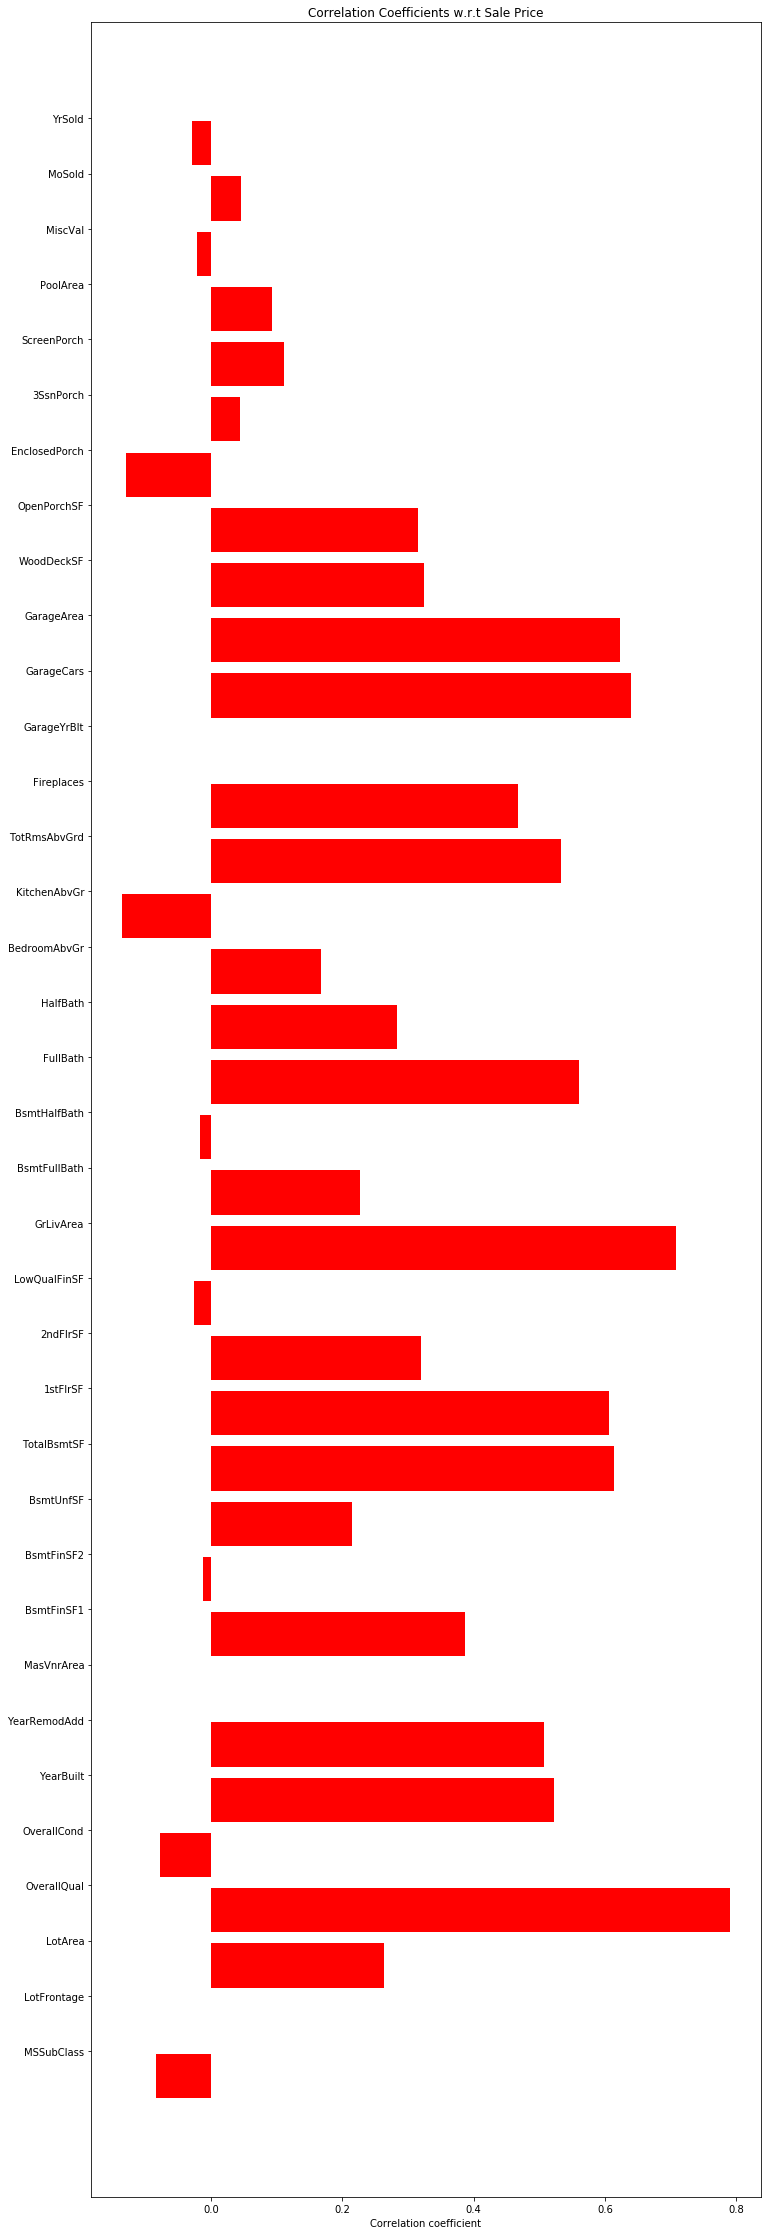

In [22]:
#plotting correlations
num_feat=houses.columns[houses.dtypes!=object]
num_feat=num_feat[1:-1] 
labels = []
values = []
for col in num_feat:
    labels.append(col)
    values.append(np.corrcoef(houses[col].values, houses.SalePrice.values)[0,1])
    
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(12,40))
rects = ax.barh(ind, np.array(values), color='red')
ax.set_yticks(ind+((width)/2.))
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation Coefficients w.r.t Sale Price");

In [15]:
correlations=houses.corr()
attrs = correlations.iloc[:-1,:-1] # all except target

threshold = 0.5
important_corrs = (attrs[abs(attrs) > threshold][attrs != 1.0]) \
    .unstack().dropna().to_dict()

unique_important_corrs = pd.DataFrame(
    list(set([(tuple(sorted(key)), important_corrs[key]) \
    for key in important_corrs])), 
        columns=['Attribute Pair', 'Correlation'])

    # sorted by absolute value
unique_important_corrs = unique_important_corrs.ix[
    abs(unique_important_corrs['Correlation']).argsort()[::-1]]

unique_important_corrs

C:\Users\vaibhavgupta02\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


,Attribute Pair,Correlation
23,"(GarageArea, GarageCars)",0.882475
15,"(GarageYrBlt, YearBuilt)",0.825667
26,"(GrLivArea, TotRmsAbvGrd)",0.825489
18,"(1stFlrSF, TotalBsmtSF)",0.819530
19,"(2ndFlrSF, GrLivArea)",0.687501
6,"(BedroomAbvGr, TotRmsAbvGrd)",0.676620
4,"(BsmtFinSF1, BsmtFullBath)",0.649212
24,"(GarageYrBlt, YearRemodAdd)",0.642277
7,"(FullBath, GrLivArea)",0.630012
13,"(2ndFlrSF, TotRmsAbvGrd)",0.616423


In [25]:
# This shows multicollinearity. In regression, "multicollinearity" refers to features that are correlated with other features. Multicollinearity occurs when your model includes multiple factors that are correlated not just to your target variable, but also to each other.

# Problem:

# Multicollinearity increases the standard errors of the coefficients. That means, multicollinearity makes some variables statistically insignificant when they should be significant.

# To avoid this we can do 3 things:

# Completely remove those variables
# Make new feature by adding them or by some other operation.
# Use PCA, which will reduce feature set to small number of non-collinear features.

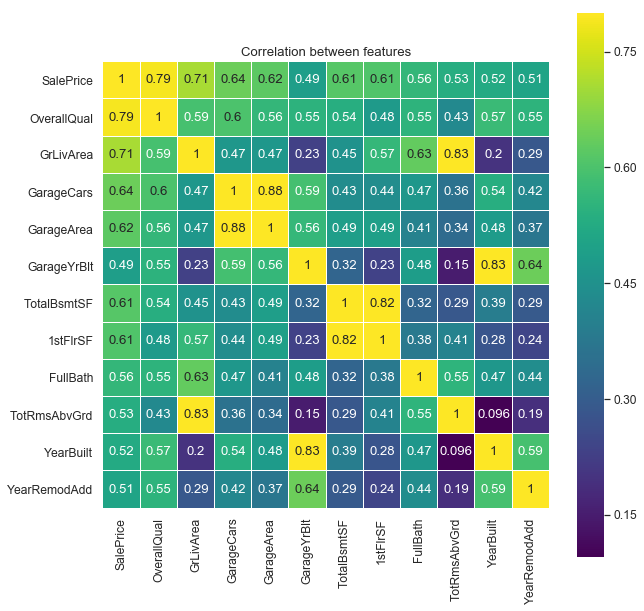

In [28]:
corrMatrix=houses[["SalePrice","OverallQual","GrLivArea","GarageCars",
                  "GarageArea","GarageYrBlt","TotalBsmtSF","1stFlrSF","FullBath",
                  "TotRmsAbvGrd","YearBuilt","YearRemodAdd"]].corr()

sb.set(font_scale=1.10)
plt.figure(figsize=(10, 10))

sb.heatmap(corrMatrix, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='viridis',linecolor="white")
plt.title('Correlation between features');

In [29]:
# As we saw above there are few feature which shows high multicollinearity from heatmap. Lets focus on yellow squares on diagonal line and few on the sides.

# SalePrice and OverallQual
# GarageArea and GarageCars
# TotalBsmtSF and 1stFlrSF
# GrLiveArea and TotRmsAbvGrd
# YearBulit and GarageYrBlt

# We have to create a single feature from them before we use them as predictors


In [30]:
#PIVOTAL FEATURES
houses[['OverallQual','SalePrice']].groupby(['OverallQual'],
as_index=False).mean().sort_values(by='OverallQual', ascending=False)


,OverallQual,SalePrice
9,10,438588.388889
8,9,367513.023256
7,8,274735.535714
6,7,207716.423197
5,6,161603.034759
4,5,133523.347607
3,4,108420.655172
2,3,87473.750000
1,2,51770.333333
0,1,50150.000000


In [31]:
houses[['GarageCars','SalePrice']].groupby(['GarageCars'],
as_index=False).mean().sort_values(by='GarageCars', ascending=False)

,GarageCars,SalePrice
4,4,192655.800000
3,3,309636.121547
2,2,183851.663835
1,1,128116.688347
0,0,103317.283951


In [32]:
houses[['Fireplaces','SalePrice']].groupby(['Fireplaces'],
as_index=False).mean().sort_values(by='Fireplaces', ascending=False)

,Fireplaces,SalePrice
3,3,252000.000000
2,2,240588.539130
1,1,211843.909231
0,0,141331.482609


## Univariate Analysis

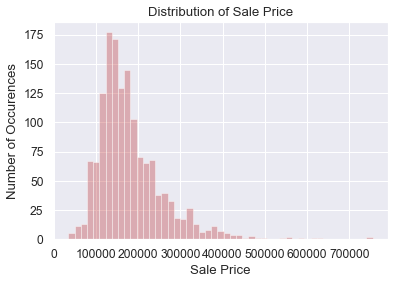

In [33]:
# How 1 single variable is distributed in numeric range. What is statistical summary of it. Is it positively skewed or negatively.


sb.distplot(houses['SalePrice'], color="r", kde=False)
plt.title("Distribution of Sale Price")
plt.ylabel("Number of Occurences")
plt.xlabel("Sale Price");

# Prices are right skewed and graph shows some peakedness.

In [34]:
#skewness  
print(houses['SalePrice'].skew())

#Kurtosis
print(houses['SalePrice'].kurt())


1.8828757597682129
6.536281860064529


C:\Users\vaibhavgupta02\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\vaibhavgupta02\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


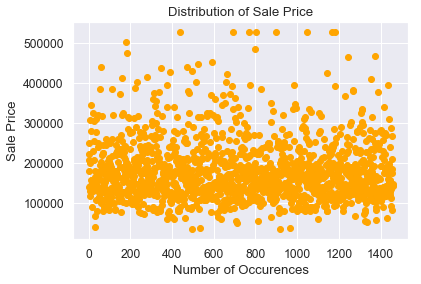

In [35]:
# REMOVAL OF OUTLIERS
upperlimit = np.percentile(houses.SalePrice.values, 99.5)
houses['SalePrice'].ix[houses['SalePrice']>upperlimit] = upperlimit

plt.scatter(range(houses.shape[0]), houses["SalePrice"].values,color='orange')
plt.title("Distribution of Sale Price")
plt.xlabel("Number of Occurences")
plt.ylabel("Sale Price");

## Missing Value Imputation

In [36]:
# Missing values in the training data set can affect prediction or classification of a model negatively.

# Also some machine learning algorithms can't accept missing data eg. SVM.

# But filling missing values with mean/median/mode or using another predictive model to predict missing values 
# is also a prediction which may not be 100% accurate, instead we can use models like Decision Trees and Random 
# Forest which handle missing values very well.


In [37]:
#Checjing missing values 
null_columns=houses.columns[houses.isnull().any()]
houses[null_columns].isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

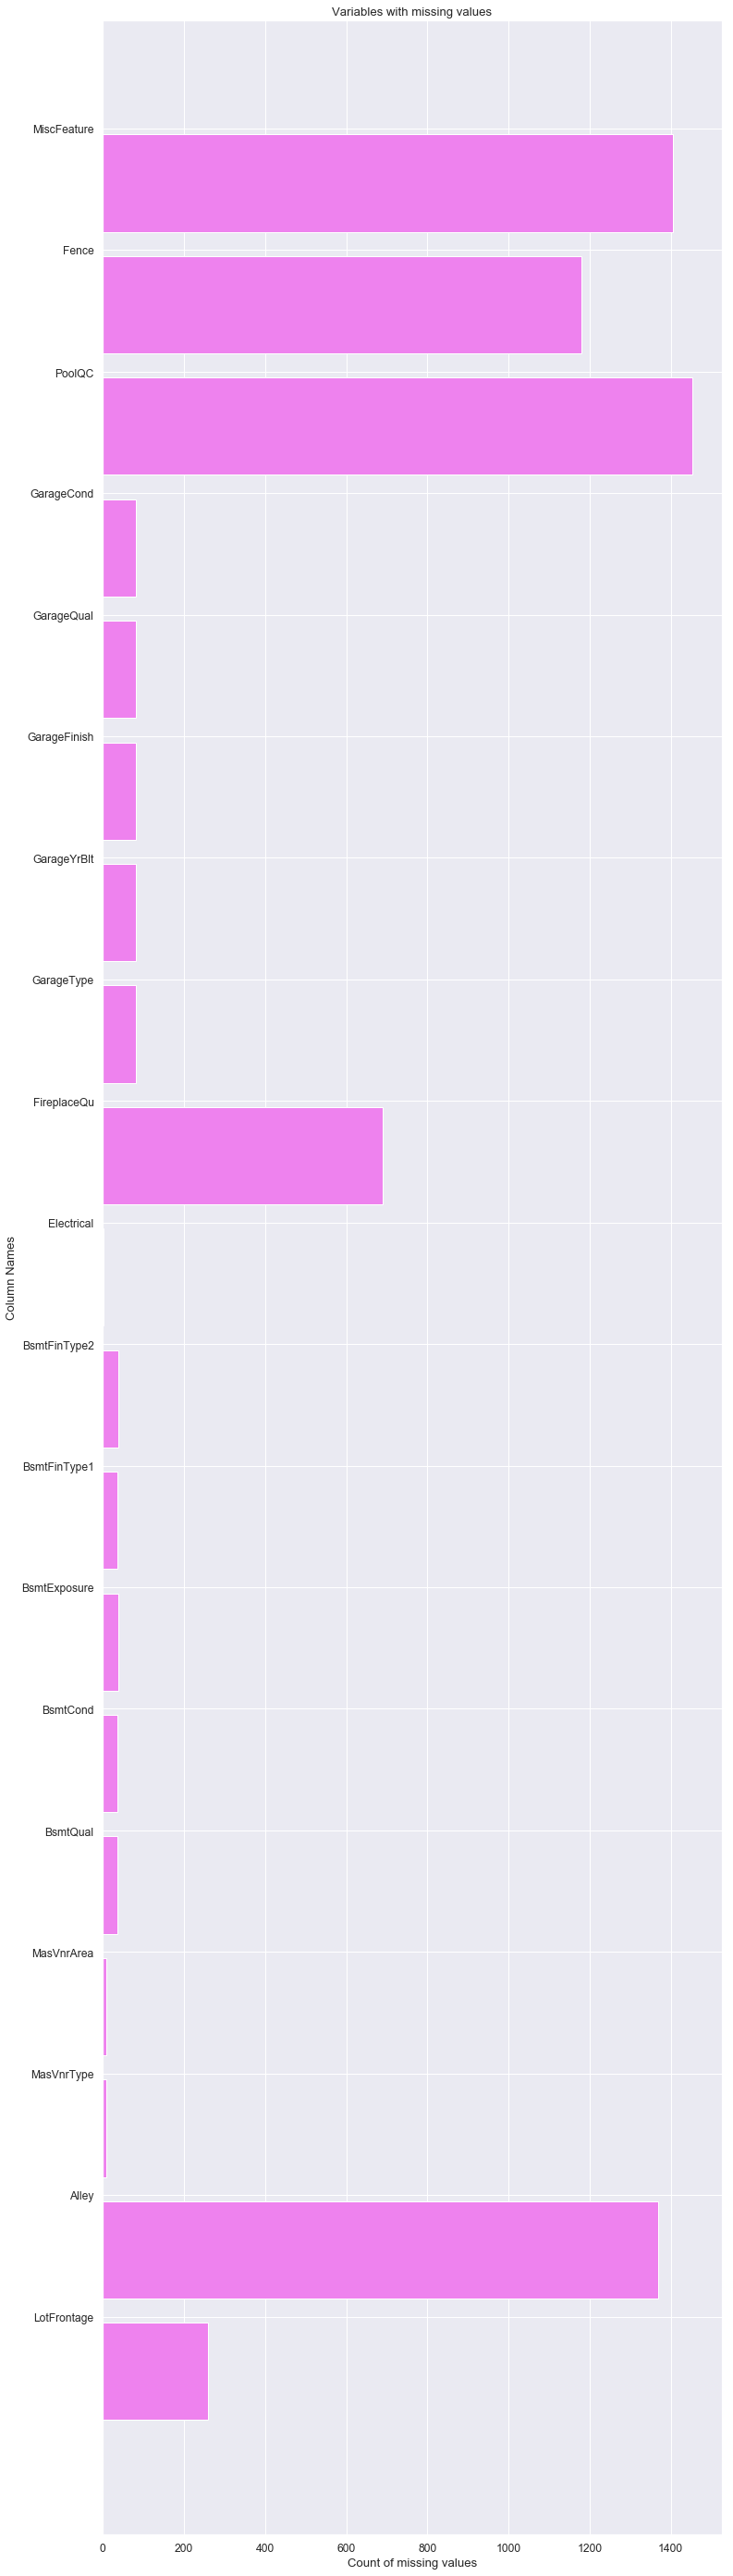

In [38]:
# Graphical representation of missing data
labels = []
values = []
for col in null_columns:
    labels.append(col)
    values.append(houses[col].isnull().sum())
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(12,50))
rects = ax.barh(ind, np.array(values), color='violet')
ax.set_yticks(ind+((width)/2.))
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_ylabel("Column Names")
ax.set_title("Variables with missing values");

## Multivariate Analysis
when we understan how 3 or more varriables behave according to each other

In [39]:
#LotFrontage
#We can see if there is some correlation between LotArea and LotFrontage
houses['LotFrontage'].corr(houses['LotArea'])
# This is not great, we will try some polynomial expressions like squareroot

0.42609501877180816

In [40]:
houses['SqrtLotArea']=np.sqrt(houses['LotArea'])
houses['LotFrontage'].corr(houses['SqrtLotArea'])
#0.60 is better than 0.4

0.6020022167939364

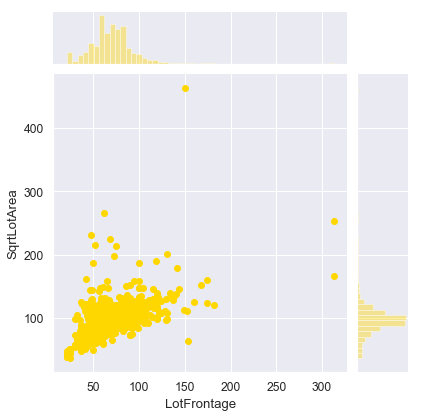

In [41]:
sb.jointplot(houses['LotFrontage'],houses['SqrtLotArea'],color='gold');